# Pruebas de Hipótesis - Correlación y Regresión

El estudiante debe descargar el archivo del siguiente enlace y realizar el respectivo análisis haciendo uso de los modelos lineales: https://www.dropbox.com/s/vv0f1k2y5nalpgx/bank-additional-full.csv?dl=0

Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario) estaba ("sí") o no ("no") suscrito.

Las variables registradas son las siguientes:

-    `age` - edad
-    `job` - tipo de trabajo 
-    `marital` - estado civil
-    `education` - nivel educativo
-    `default` - crédito en incumplimiento
-    `housing` - crédito de vivienda
-    `loan` - préstamos personal
-    `contact` - tipo de contacto realizado
-    `month` - mes en que se hizo el último contacto
-    `day_of_week` - último día de contacto de la semana
-    `duration` - duración del último contacto, en segundos
-    `campaign` - número de contactos realizados durante esta campaña y para este cliente
-    `pdays` - número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (999 significa que el cliente no fue contactado previamente)
-    `previous`- número de contactos realizados antes de esta campaña y para este cliente
-    `poutcome` - resultado de la campaña de marketing anterior
-    `emp.var.rate`- tasa de variación del empleo - indicador trimestral
-    `cons.price.idx` - índice de precios al consumidor - indicador mensual
-    `cons.conf.idx` - índice de confianza del consumidor - indicador mensual
-    `euribor3m` - euribor tasa de 3 meses - indicador diario
-    `nr.employed` - número de empleados
-    `y` - ¿el cliente ha suscrito un depósito a plazo?

Los datos fueron tomados de: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

**Asignatura: Estadistica 2**

**Profesor: Carlos Alfonso Mantilla Duarte**

**Grupo: F1**



<table style="font-size:14px;">
<thead>
<td style="text-align:center" ><strong>Integrante</strong></td>
<td style="text-align:center"><strong>Codigo</strong></td>
</thead>
<tr>
<td style="text-align:center">Orlando Alberto Moncada Rodriguez</td>
<td style="text-align:center">2170133</td>
</tr>
    <tr>
<td style="text-align:center">Santiago Andres Castro Duitama</td>
<td style="text-align:center">2170134</td>
</tr>
    <tr>
<td style="text-align:center">David Santiago Morales Norato</td>
<td style="text-align:center">2170102</td>
</tr>
</table>

## Librerias

In [ ]:
#library(ggm)
install.packages("corrplot")
install.packages("Hmisc")
install.packages('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [ ]:
library("corrplot")
library("lmtest")
library("Hmisc")

corrplot 0.84 loaded

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




## Importamos los datos

In [ ]:
#bank<-read.csv("bank-additional-full.csv")
bank<-read.csv(url("https://raw.githubusercontent.com/BlueCraziness/Estadistica2/master/bank-additional-full.csv"))
head(bank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [ ]:
#Organizamos las variables siendo las primeras las continuas y luego las no continuas
info<-data.frame(
    age=bank$age,
    dur=bank$duration,
    camp=bank$campaign,
    days=bank$pdays,
    evr=bank$emp.var.rate,
    cpi=bank$cons.price.idx,
    cci=bank$cons.conf.idx,
    eur=bank$euribor3m,
    nremp=bank$nr.employed,
    prev=bank$previous
    
    # trab=bank$job,
    # mar=bank$marital,
    # edu=bank$education,
    # def=bank$default, #Not defense
    # house=bank$housing,
    # loan=bank$loan,
    # cont=bank$contact,
    # month=bank$month,
    # day=bank$day_of_week,
    # come=bank$poutcome,
    # y=bank$y
)

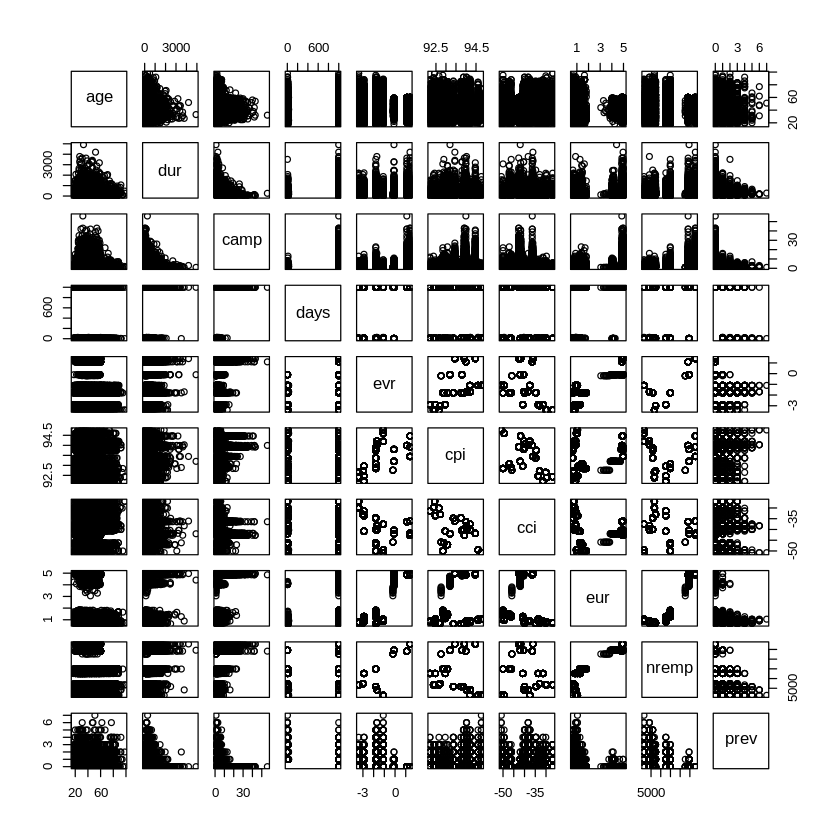

In [ ]:
plot(info)

In [ ]:
C<-cor(info)

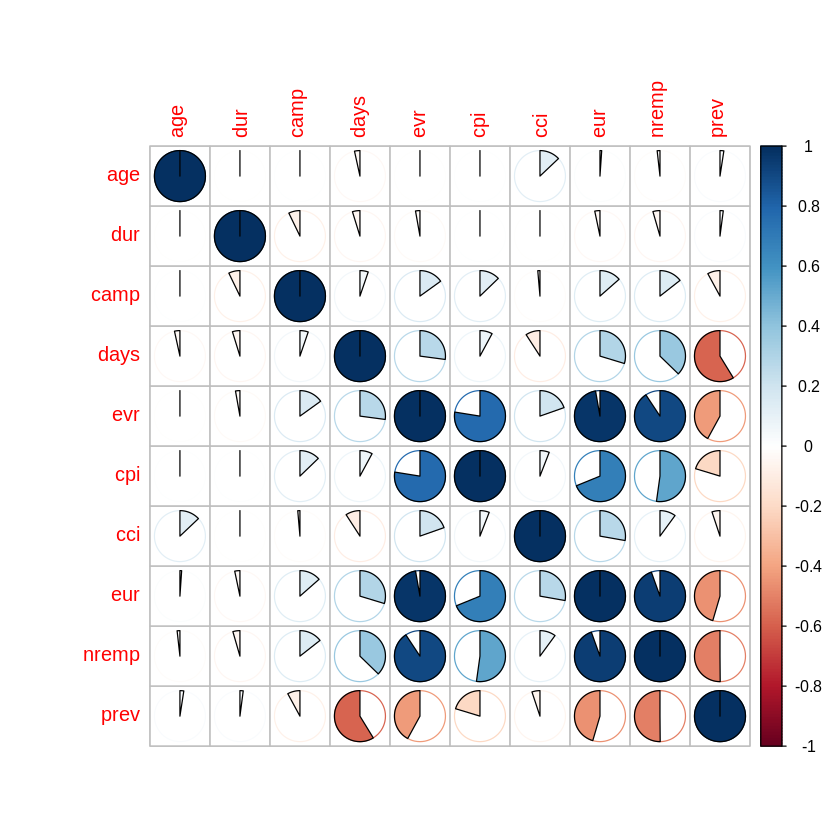

In [ ]:
corrplot(C, method="pie")

## Test de correlaci+on para los datos

In [ ]:
rcorr(as.matrix(info))

        age   dur  camp  days   evr   cpi   cci   eur nremp  prev
age    1.00  0.00  0.00 -0.03  0.00  0.00  0.13  0.01 -0.02  0.02
dur    0.00  1.00 -0.07 -0.05 -0.03  0.01 -0.01 -0.03 -0.04  0.02
camp   0.00 -0.07  1.00  0.05  0.15  0.13 -0.01  0.14  0.14 -0.08
days  -0.03 -0.05  0.05  1.00  0.27  0.08 -0.09  0.30  0.37 -0.59
evr    0.00 -0.03  0.15  0.27  1.00  0.78  0.20  0.97  0.91 -0.42
cpi    0.00  0.01  0.13  0.08  0.78  1.00  0.06  0.69  0.52 -0.20
cci    0.13 -0.01 -0.01 -0.09  0.20  0.06  1.00  0.28  0.10 -0.05
eur    0.01 -0.03  0.14  0.30  0.97  0.69  0.28  1.00  0.95 -0.45
nremp -0.02 -0.04  0.14  0.37  0.91  0.52  0.10  0.95  1.00 -0.50
prev   0.02  0.02 -0.08 -0.59 -0.42 -0.20 -0.05 -0.45 -0.50  1.00

n= 41188 


P
      age    dur    camp   days   evr    cpi    cci    eur    nremp  prev  
age          0.8605 0.3512 0.0000 0.9400 0.8620 0.0000 0.0289 0.0003 0.0000
dur   0.8605        0.0000 0.0000 0.0000 0.2810 0.0972 0.0000 0.0000 0.0000
camp  0.3512 0.0000        0.00


### Este test de correlación no nos brinda mucha información.


# Definición de los modelos lineales


La variable dependiente que usaremos es "eur"

Las variables que según la matriz de correlación nos pueden brindar información al modelo son: "evr","cpi", "cci", "nremp", "prev"

## 1. Modelo lineal múltiple que usa todas las variables


In [19]:
lm_all_v <- lm(eur ~ . , data = info)
summary(lm_all_v)


Call:
lm(formula = eur ~ ., data = info)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57888 -0.17510  0.00259  0.13971  1.04407 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -9.220e+01  6.275e-01 -146.945  < 2e-16 ***
age          2.916e-04  1.032e-04    2.825  0.00472 ** 
dur          9.026e-06  4.129e-06    2.186  0.02881 *  
camp        -6.600e-03  3.906e-04  -16.897  < 2e-16 ***
days         1.917e-05  7.243e-06    2.646  0.00814 ** 
evr          4.117e-01  3.331e-03  123.600  < 2e-16 ***
cpi          3.377e-01  4.325e-03   78.085  < 2e-16 ***
cci          5.398e-02  2.640e-04  204.500  < 2e-16 ***
nremp        1.284e-02  5.370e-05  239.169  < 2e-16 ***
prev         3.716e-03  2.886e-03    1.288  0.19780    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2162 on 41178 degrees of freedom
Multiple R-squared:  0.9845,	Adjusted R-squared:  0.9845 
F-statistic: 2.898e+05 on 9 and 41178

## 2. Modelo lineal con variables escogidas gracias a la matriz de correlación 


In [16]:
lm_some_v <- lm(eur ~  evr+cpi+cci+nremp+prev , data = info)
summary(lm_some_v)


Call:
lm(formula = eur ~ evr + cpi + cci + nremp + prev, data = info)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55942 -0.17572  0.01432  0.14739  1.04944 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.190e+01  6.295e-01 -145.99   <2e-16 ***
evr          4.113e-01  3.343e-03  123.02   <2e-16 ***
cpi          3.354e-01  4.331e-03   77.44   <2e-16 ***
cci          5.410e-02  2.601e-04  207.96   <2e-16 ***
nremp        1.283e-02  5.375e-05  238.68   <2e-16 ***
prev         5.770e-04  2.509e-03    0.23    0.818    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.217 on 41182 degrees of freedom
Multiple R-squared:  0.9843,	Adjusted R-squared:  0.9843 
F-statistic: 5.178e+05 on 5 and 41182 DF,  p-value: < 2.2e-16


## 3. Modelo lineal mpultiple con variables que según la función "stem" son las óptimas a usar

In [20]:
step(lm_all_v)

Start:  AIC=-126138.4
eur ~ age + dur + camp + days + evr + cpi + cci + nremp + prev

        Df Sum of Sq    RSS     AIC
- prev   1      0.08 1925.5 -126139
<none>               1925.4 -126138
- dur    1      0.22 1925.7 -126136
- days   1      0.33 1925.8 -126133
- age    1      0.37 1925.8 -126132
- camp   1     13.35 1938.8 -125856
- cpi    1    285.10 2210.5 -120453
- evr    1    714.34 2639.8 -113144
- cci    1   1955.47 3880.9  -97271
- nremp  1   2674.71 4600.2  -90268

Step:  AIC=-126138.7
eur ~ age + dur + camp + days + evr + cpi + cci + nremp

        Df Sum of Sq    RSS     AIC
<none>               1925.5 -126139
- dur    1      0.22 1925.7 -126136
- days   1      0.25 1925.8 -126135
- age    1      0.38 1925.9 -126133
- camp   1     13.38 1938.9 -125855
- cpi    1    285.15 2210.7 -120453
- evr    1    716.71 2642.2 -113108
- cci    1   1971.31 3896.8  -97105
- nremp  1   2742.41 4667.9  -89668



Call:
lm(formula = eur ~ age + dur + camp + days + evr + cpi + cci + 
    nremp, data = info)

Coefficients:
(Intercept)          age          dur         camp         days          evr  
 -9.212e+01    2.935e-04    8.900e-06   -6.608e-03    1.451e-05    4.119e-01  
        cpi          cci        nremp  
  3.375e-01    5.395e-02    1.283e-02  


In [21]:
lm_opti_v <- lm(eur ~ age + dur + camp + days + evr + cpi + cci + nremp, data = info)
summary(lm_opti_v)


Call:
lm(formula = eur ~ age + dur + camp + days + evr + cpi + cci + 
    nremp, data = info)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57783 -0.17512  0.00253  0.13950  1.04399 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -9.212e+01  6.243e-01 -147.564  < 2e-16 ***
age          2.935e-04  1.032e-04    2.845  0.00445 ** 
dur          8.900e-06  4.127e-06    2.156  0.03107 *  
camp        -6.608e-03  3.906e-04  -16.918  < 2e-16 ***
days         1.451e-05  6.277e-06    2.312  0.02077 *  
evr          4.119e-01  3.327e-03  123.804  < 2e-16 ***
cpi          3.375e-01  4.322e-03   78.091  < 2e-16 ***
cci          5.395e-02  2.627e-04  205.324  < 2e-16 ***
nremp        1.283e-02  5.298e-05  242.175  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2162 on 41179 degrees of freedom
Multiple R-squared:  0.9845,	Adjusted R-squared:  0.9845 
F-statistic: 3.261e+05 on 8 and 41179 DF

## Comparaciones de los modelos

In [22]:
# Modelo 1 vs Modelo 2
AIC(lm_all_v,lm_some_v)


,df,AIC
,<dbl>,<dbl>
lm_all_v,11,-9249.906
lm_some_v,7,-8948.444


In [23]:
# Modelo 1 vs Modelo 2
BIC(lm_all_v,lm_some_v)

,df,BIC
,<dbl>,<dbl>
lm_all_v,11,-9155.021
lm_some_v,7,-8888.063


In [24]:
# Modelo 1 vs Modelo 3
AIC(lm_all_v,lm_opti_v)


,df,AIC
,<dbl>,<dbl>
lm_all_v,11,-9249.906
lm_opti_v,10,-9250.247


In [25]:
# Modelo 1 vs Modelo 3
BIC(lm_all_v,lm_opti_v)

,df,BIC
,<dbl>,<dbl>
lm_all_v,11,-9155.021
lm_opti_v,10,-9163.988


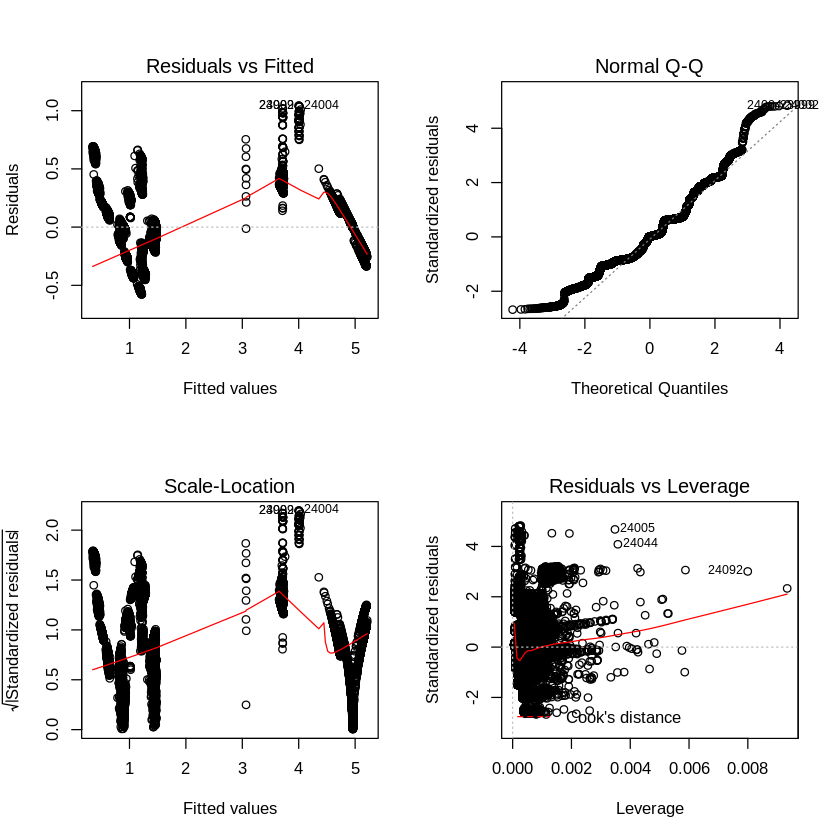

In [26]:
par(mfrow = c(2,2))
plot(lm_all_v)
par(mfrow = c(1,1))

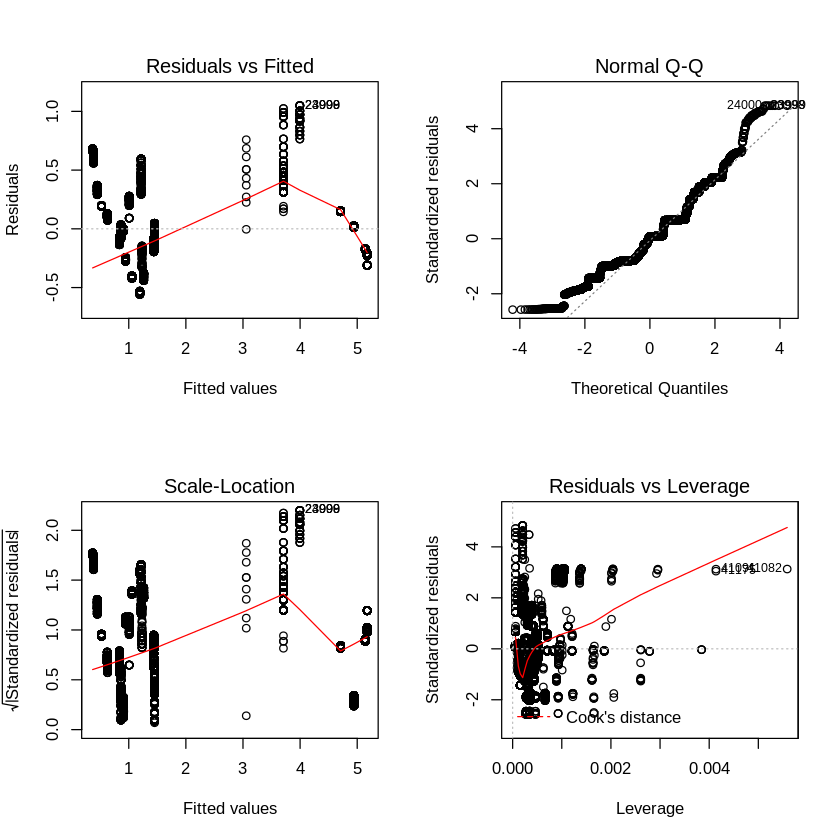

In [27]:
par(mfrow = c(2,2))
plot(lm_some_v)
par(mfrow = c(1,1))

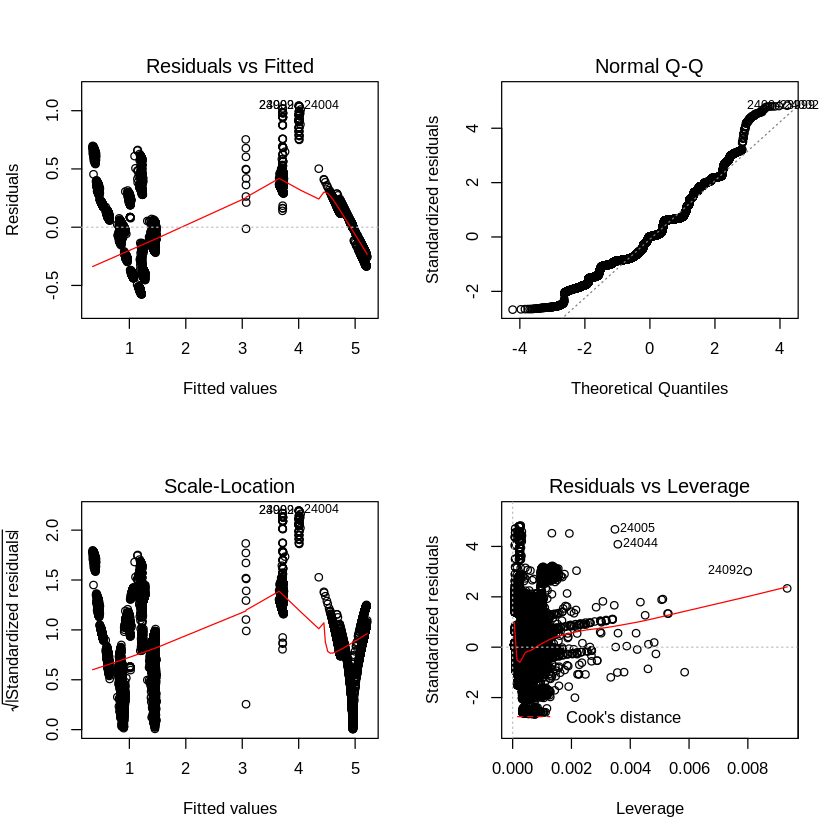

In [28]:
par(mfrow = c(2,2))
plot(lm_opti_v)
par(mfrow = c(1,1))